# Final Project - DS 2500

Prof. Marina Kogan

Minh Le

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

import numpy as np
import pandas as pd


# 1. Formulate your question

In this project, I consider the dataset from Kaggle and it called "Premier League Standings 22 Seasons (2000-2022)". We will go through the process to figure out the answer to the question "Which teams have the best attacking record in the last decade?"

# 2. Read in your data

In [6]:
# Read in the raw dataset I pulled in github from Kaggle
pl_standing_df = pd.read_csv('https://raw.githubusercontent.com/anonymousminh/Data-Wrangling-Project/main/EPL%20Standings%202000-2022.csv')

# 3. Check the packaging

In [7]:
pl_standing_df.shape

(440, 12)

In [8]:
pl_standing_df.isnull().sum()

Season                         0
Pos                            0
Team                           0
Pld                            0
W                              0
D                              0
L                              0
GF                             0
GA                             0
GD                             0
Pts                            0
Qualification or relegation    0
dtype: int64

# 4. Look at the top and bottom of data

In [9]:
pl_standing_df.head()

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
0,2000-01,1,Manchester United,38,24,8,6,79,31,48,80,Qualification for the Champions League first g...
1,2000-01,2,Arsenal,38,20,10,8,63,38,25,70,Qualification for the Champions League first g...
2,2000-01,3,Liverpool,38,20,9,9,71,39,32,69,Qualification for the Champions League third q...
3,2000-01,4,Leeds United,38,20,8,10,64,43,21,68,Qualification for the UEFA Cup first round[a]
4,2000-01,5,Ipswich Town,38,20,6,12,57,42,15,66,Qualification for the UEFA Cup first round[a]


In [ ]:
pl_standing_df.tail()

,Season,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
435,2021-22,16,Everton,38,11,6,21,43,66,-23,39,Not Applicable
436,2021-22,17,Leeds United,38,9,11,18,42,79,-37,38,Not Applicable
437,2021-22,18,Burnley,38,7,14,17,34,53,-19,35,Relegation to the EFL Championship
438,2021-22,19,Watford,38,6,5,27,34,77,-43,23,Relegation to the EFL Championship
439,2021-22,20,Norwich City,38,5,7,26,23,84,-61,22,Relegation to the EFL Championship


# 5. Check the "n"s

In [ ]:
pl_standing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Season                       440 non-null    object
 1   Pos                          440 non-null    int64 
 2   Team                         440 non-null    object
 3   Pld                          440 non-null    int64 
 4   W                            440 non-null    int64 
 5   D                            440 non-null    int64 
 6   L                            440 non-null    int64 
 7   GF                           440 non-null    int64 
 8   GA                           440 non-null    int64 
 9   GD                           440 non-null    int64 
 10  Pts                          440 non-null    int64 
 11  Qualification or relegation  440 non-null    object
dtypes: int64(9), object(3)
memory usage: 41.4+ KB


# 6. Validate against an external knowledge or data source


The most won matches that it ever happened in the last decade.

In [ ]:
pl_standing_df['W'].max()

32

# 7. Make a plot

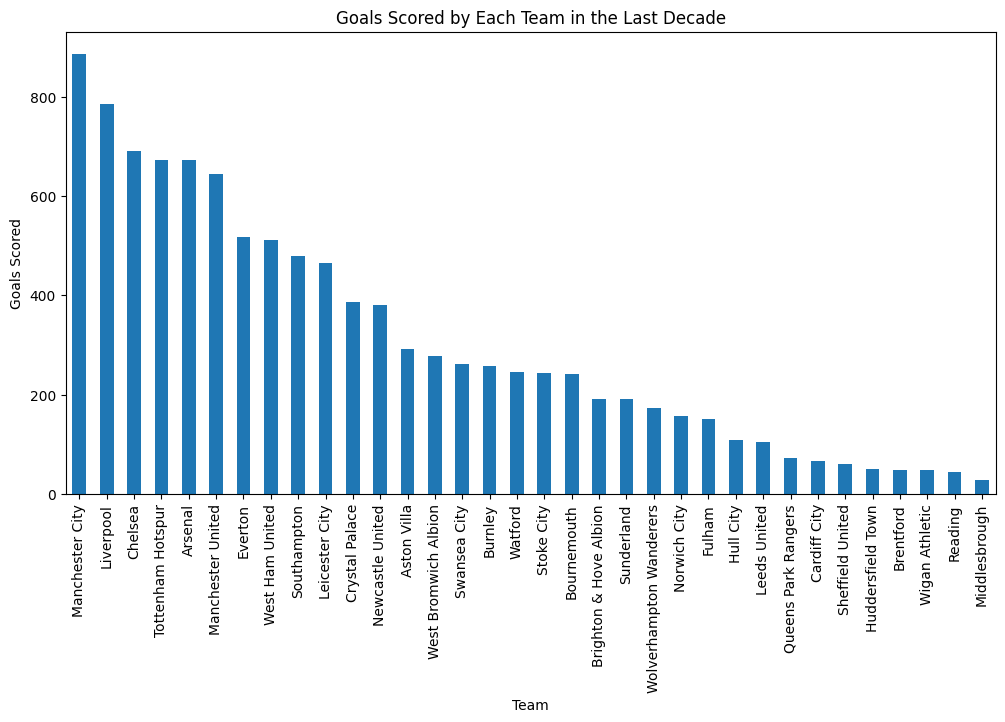

In [29]:
# prompt: create a plot for goals scores by each team in the Last decade

# Get the data for the last decade (2012-2022)
df_last_decade = pl_standing_df[pl_standing_df['Season'] >= '2012-13']

# Group the data by team and calculate the sum of goals scored
goals_by_team = df_last_decade.groupby('Team')['GF'].sum().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
goals_by_team.plot(kind='bar')

# Add title and labels
plt.title('Goals Scored by Each Team in the Last Decade')
plt.xlabel('Team')
plt.ylabel('Goals Scored')

# Show the plot
plt.show()


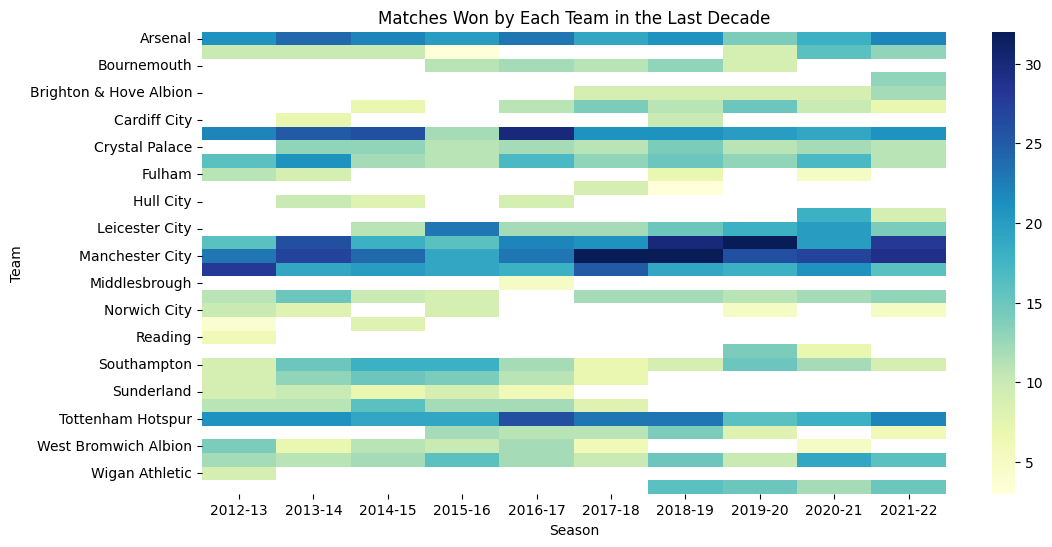

In [31]:
# prompt: Create a heat map of matches won by each team in the last decades

# Get the data for the last decade (2012-2022)
df_last_decade = pl_standing_df[pl_standing_df['Season'] >= '2012-13']

# Create a pivot table with teams as rows and seasons as columns, and values as the number of matches won
matches_won_pivot = df_last_decade.pivot_table(index='Team', columns='Season', values='W')

# Create a heatmap
plt.figure(figsize=(12, 6))
sb.heatmap(matches_won_pivot, cmap='YlGnBu')

# Add title and labels
plt.title('Matches Won by Each Team in the Last Decade')
plt.xlabel('Season')
plt.ylabel('Team')

# Show the plot
plt.show()


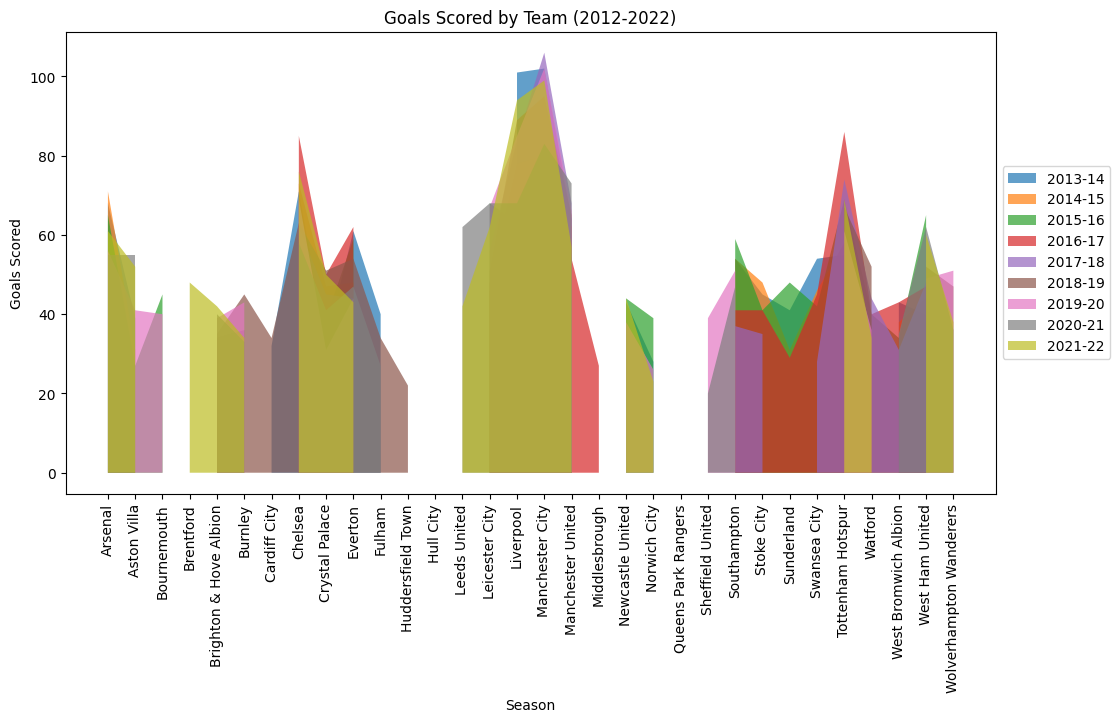

In [25]:
# prompt: Create line plots or area charts showing the trend of goals scored for each team over the last decade.

# Create a subset of the data for the last decade
decade_df = pl_standing_df[pl_standing_df['Season'] >= '2012-2013']

# Group the data by team and season
grouped_df = decade_df.groupby(['Team', 'Season'])['GF'].sum().unstack()

# Create an area chart
plt.figure(figsize=(12, 6))
for column in grouped_df:
    plt.fill_between(grouped_df.index, grouped_df[column], alpha=0.7)

# Rotate x-axis labels
plt.xticks(rotation=90)

# Add a title and labels
plt.title("Goals Scored by Team (2012-2022)")
plt.xlabel("Season")
plt.ylabel("Goals Scored")

# Add legend
plt.legend(grouped_df.columns, loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()
